In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Activation, Flatten 
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
import matplotlib.pyplot as plt

In [2]:
number_classes = 10
wght_decay = 0.00005
x_shape = [32,32,3]
batch_size = 1024
maxepoches = 5
learning_rate = 0.1
learning_decay = 1e-6
learning_drop = 20

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

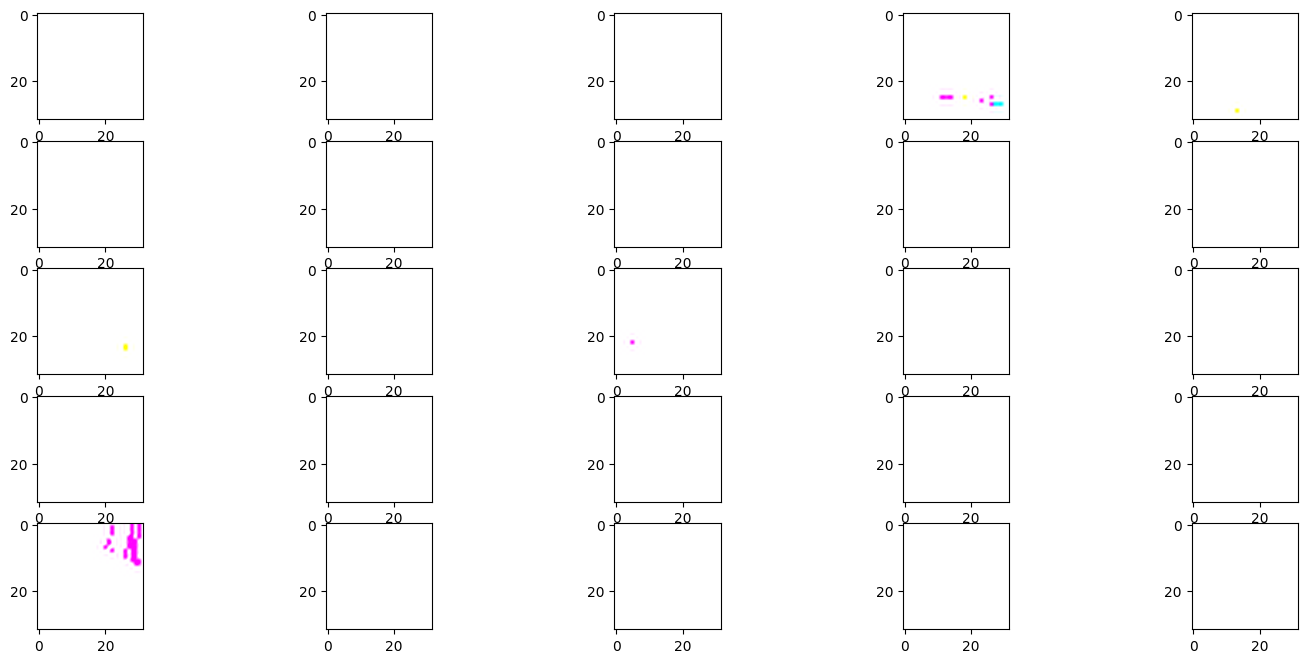

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
fig = plt.figure(figsize=(18, 8))
columns = 5
rows = 5
for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train[i],
interpolation='lanczos')

In [4]:
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train, axis=(0, 1, 2, 3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
y_train = keras.utils.to_categorical(y_train,number_classes)
y_test = keras.utils.to_categorical(y_test,number_classes)

In [5]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_shape,kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3),padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3),padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay))) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3),padding='same',kernel_regularizer=regularizers.l2(wght_decay))) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3),padding='same',kernel_regularizer=regularizers.l2(wght_decay))) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3),padding='same',kernel_regularizer=regularizers.l2(wght_decay))) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3),padding='same',kernel_regularizer=regularizers.l2(wght_decay))) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3),padding='same',kernel_regularizer=regularizers.l2(wght_decay))) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3),padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3),padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3),padding='same',kernel_regularizer=regularizers.l2(wght_decay))) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten()) 
model.add(Dense(512,kernel_regularizer=regularizers.l2(wght_decay))) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5)) 
model.add(Dense(number_classes)) 
model.add(Activation('softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0         
                                                        

                                                                 
 dropout_8 (Dropout)         (None, 1, 1, 512)         0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 activation_13 (Activation)  (None, 512)               0         
                                                                 
 batch_normalization_13 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
          

In [7]:
image_augm = ImageDataGenerator( featurewise_center=False, samplewise_center=False,featurewise_std_normalization=False,
                                samplewise_std_normalization=False, zca_whitening=False, rotation_range=12, 
                                width_shift_range=0.2, height_shift_range=0.1,horizontal_flip=True, vertical_flip=False)
image_augm.fit(x_train)

In [ ]:
sgd = optimizers.SGD(lr=learning_rate,decay=learning_decay, momentum=0.9,nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_acc', verbose=1,save_best_only=True, mode='max')
callbacks_list = [checkpoint]
trained_model = model.fit_generator(image_augm.flow(x_train, y_train, batch_size=batch_size),
                                    steps_per_epoch=x_train.shape[0]//batch_size, epochs=maxepoches,
                                    validation_data=(x_test, y_test),callbacks=callbacks_list,verbose=1)

C:\Users\Paritosh Mathur\anaconda3\lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\Paritosh Mathur\AppData\Local\Temp\ipykernel_19300\2533755234.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  trained_model = model.fit_generator(image_augm.flow(x_train, y_train, batch_size=batch_size),


Epoch 1/5
15/48 [========>.....................] - ETA: 15:22 - loss: 3.1797 - accuracy: 0.1193

In [ ]:
f, ax = plt.subplots()
ax.plot([None] + model.history.history['acc'], 'o-')
ax.plot([None] + model.history.history['val_acc'], 'x-')
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

In [ ]:
f, ax = plt.subplots()
ax.plot([None] + model.history.history['loss'], 'o-')
ax.plot([None] + model.history.history['val_loss'], 'x-')
ax.legend(['Train loss', 'Validation loss'], loc = 0)
ax.set_title('Training/Validation loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

In [ ]:
def plot_confusion_matrix(cm):
 cm = [row/sum(row) for row in cm]
 fig = plt.figure(figsize=(10, 10))
 ax = fig.add_subplot(111)
 cax = ax.matshow(cm, cmap=plt.cm.Oranges)
fig.colorbar(cax)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class IDs')
plt.ylabel('True Class IDs')
plt.show()

plot_confusion_matrix(cm)